## 회귀 (regression) 예측

수치형 값을 예측 (Y의 값이 연속된 수치로 표현)

**예시**
- 주택 가격 예측
- 매출액 예측

[도큐먼트](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [4]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

scikit-learn version 1.2. 이후부터는 load_boston이 삭제되어서 다음과 같이 데이터셋을 불러옴

from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", version=1, as_frame=True)

In [6]:
from sklearn.datasets import fetch_openml

data = fetch_openml(name="boston", version=1, as_frame=True)
# boston은 sklearn.utils.Bunch 객체
# Python의 딕셔너리와 유사한 구조, 속성에 점(.)으로 접근 가능
print(data.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


데이터 로드

In [8]:
print(data['DESCR'])

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

data['data']에는 X 데이터, data['feature_names']에는 컬럼 명입니다.

In [10]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

Y 데이터인 price도 데이터프레임에 추가 합니다.

In [12]:
df['MEDV'] = data['target']

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**컬럼 소개**

속성 수 : 13

* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

In [15]:
# 참고
# 위와 같이 직접 데이터프레임 생성 가능
# 또한 data.frame에 입력 데이터(data)와 타겟(target)이 합쳐진 데이터프레임이 이미 존재하므로 해당 데이터프레임을 바로 선언 가능
df2 = data.frame
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


train / test 데이터를 분할 합니다.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', axis=1), df['MEDV'])

In [19]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [20]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63
176,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296.0,16.6,393.23,10.11
108,0.12802,0.0,8.56,0,0.520,6.474,97.1,2.4329,5,384.0,20.9,395.24,12.27
316,0.31827,0.0,9.90,0,0.544,5.914,83.2,3.9986,4,304.0,18.4,390.70,18.33
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53


In [21]:
y_train.head()

225    50.0
176    23.2
108    19.8
316    17.8
371    50.0
Name: MEDV, dtype: float64

## 평가 지표 만들기

### MSE(Mean Squared Error)

${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 값

### MAE (Mean Absolute Error)

$(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

예측값과 실제값의 차이에 대한 **절대값**에 대하여 평균을 낸 값

### RMSE (Root Mean Squared Error)

$\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$


예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 뒤 **루트**를 씌운 값

### 평가 지표 만들어 보기

In [33]:
import numpy as np

In [34]:
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

In [35]:
def my_mse(pred, actual):
    return ((pred - actual)**2).mean()

In [36]:
my_mse(pred, actual)

4.0

In [37]:
def my_mae(pred, actual):
    return np.abs(pred - actual).mean()

In [38]:
my_mae(pred, actual)

2.0

In [39]:
def my_rmse(pred, actual):
    return np.sqrt(my_mse(pred, actual))

In [40]:
my_rmse(pred, actual)

2.0

### sklearn의 평가지표 활용하기

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
my_mae(pred, actual), mean_absolute_error(pred, actual)

(2.0, 2.0)

In [44]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(4.0, 4.0)

### 모델별 성능 확인을 위한 함수

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)

    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10

    length = len(df)

    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])

    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)

    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

## LinearRegression

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
model = LinearRegression(n_jobs=-1)

In [51]:
# 데이터의 CHAS와 RAD가 category 타입이라서 그대로 predict를 하면 TypeError가 발생
# 마찬가지로 train 데이터도 타입을 변경해서 fit을 해주는게 일관성 유지에 도움
x_test.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object

* n_jobs: CPU코어의 사용

In [53]:
# astype으로 타입 변경
x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [54]:
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [55]:
pred = model.predict(x_test)

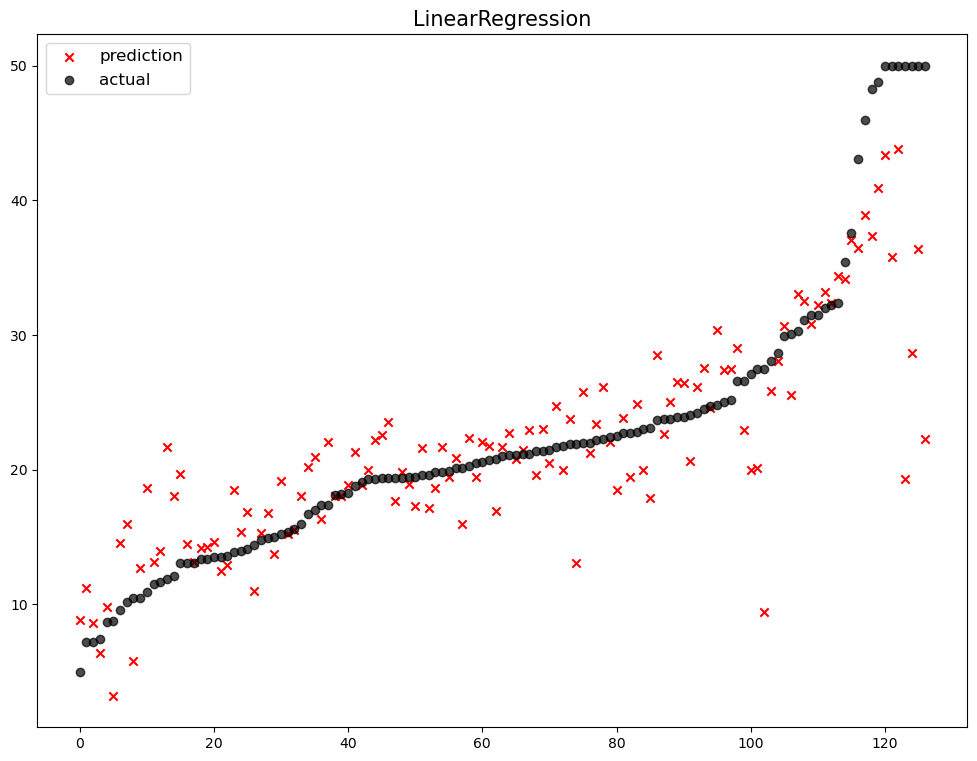

              model        mse
0  LinearRegression  34.179865


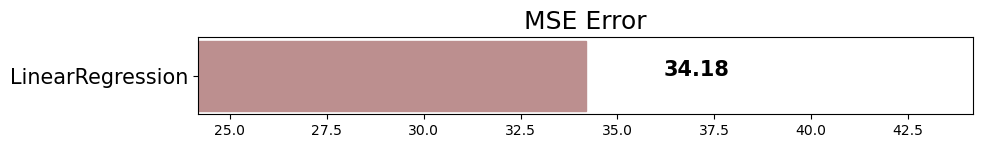

In [56]:
mse_eval('LinearRegression', pred, y_test)

## 규제 (Regularization)

학습이 과대적합 되는 것을 방지하고자 일종의 **penalty**를 부여하는 것

**L2 규제 (L2 Regularization)**

* 각 가중치 제곱의 합에 규제 강도(Regularization Strength) λ를 곱한다.
* λ를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), λ를 작게 하면 가중치가 증가한다(규제를 중요시하지 않음).

**L1 규제 (L1 Regularization)**

* 가중치의 제곱의 합이 아닌 **가중치의 합**을 더한 값에 규제 강도(Regularization Strength) λ를 곱하여 오차에 더한다.
* 어떤 가중치(w)는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것이다.


**L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2규제가 더 많이 사용된다**

**릿지(Ridge) - L2 규제**

$Error=MSE+αw^2$

**라쏘(Lasso) - L1 규제**  

$Error=MSE+α|w|$

In [61]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [62]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

In [63]:
from sklearn.linear_model import Lasso

In [64]:
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

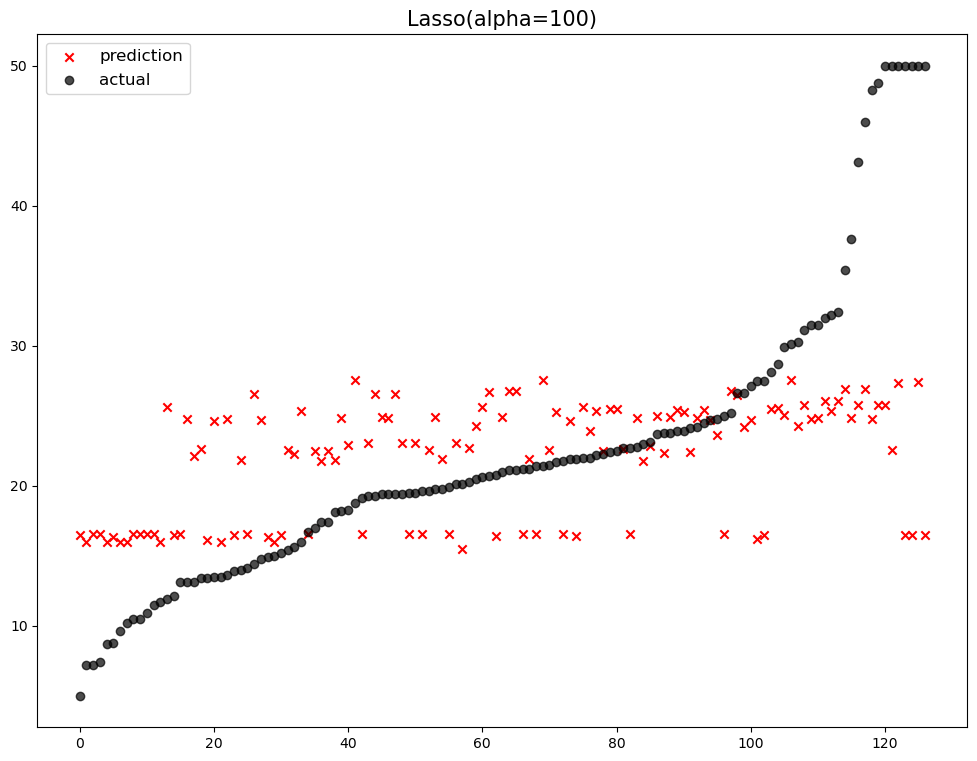

              model        mse
0  Lasso(alpha=100)  89.411990
1  LinearRegression  34.179865


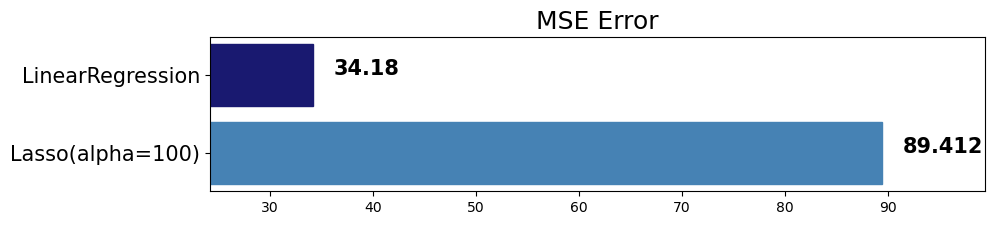

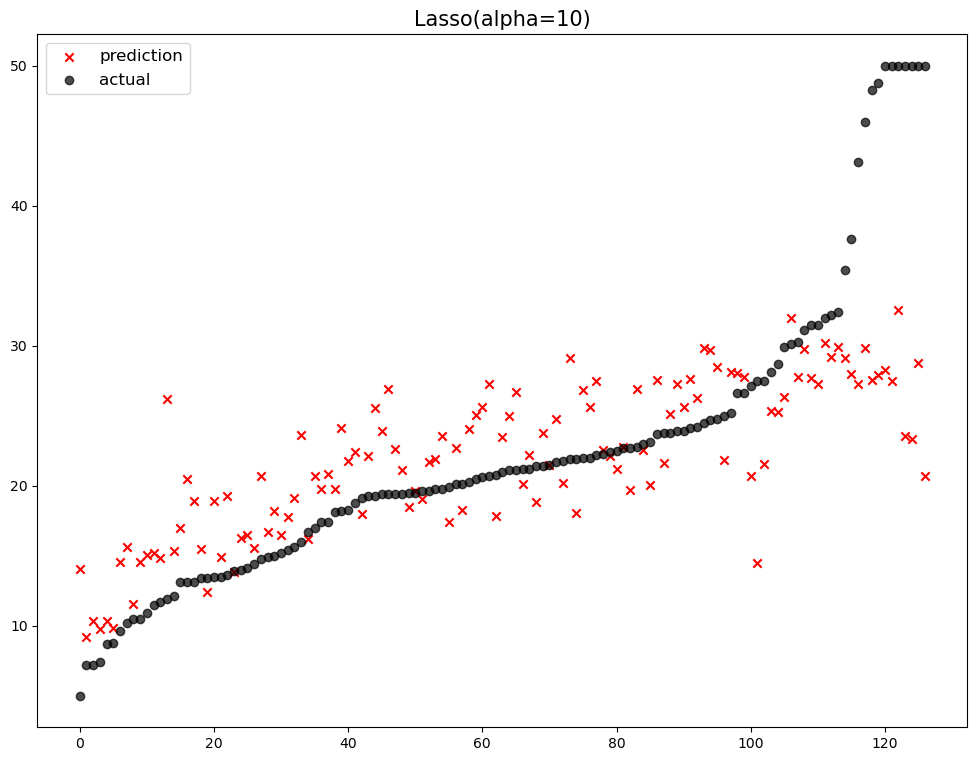

              model        mse
0  Lasso(alpha=100)  89.411990
1   Lasso(alpha=10)  58.044117
2  LinearRegression  34.179865


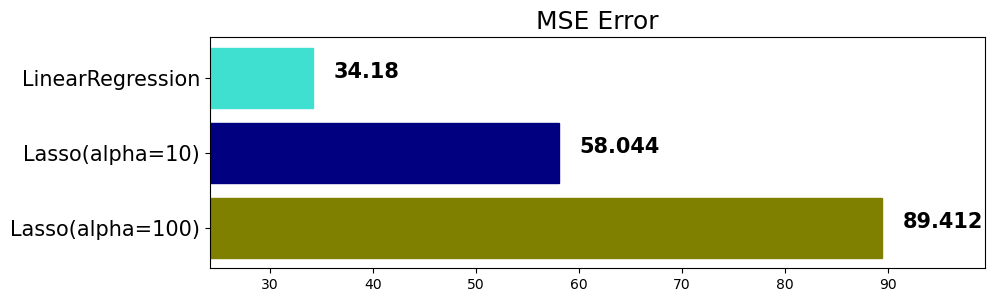

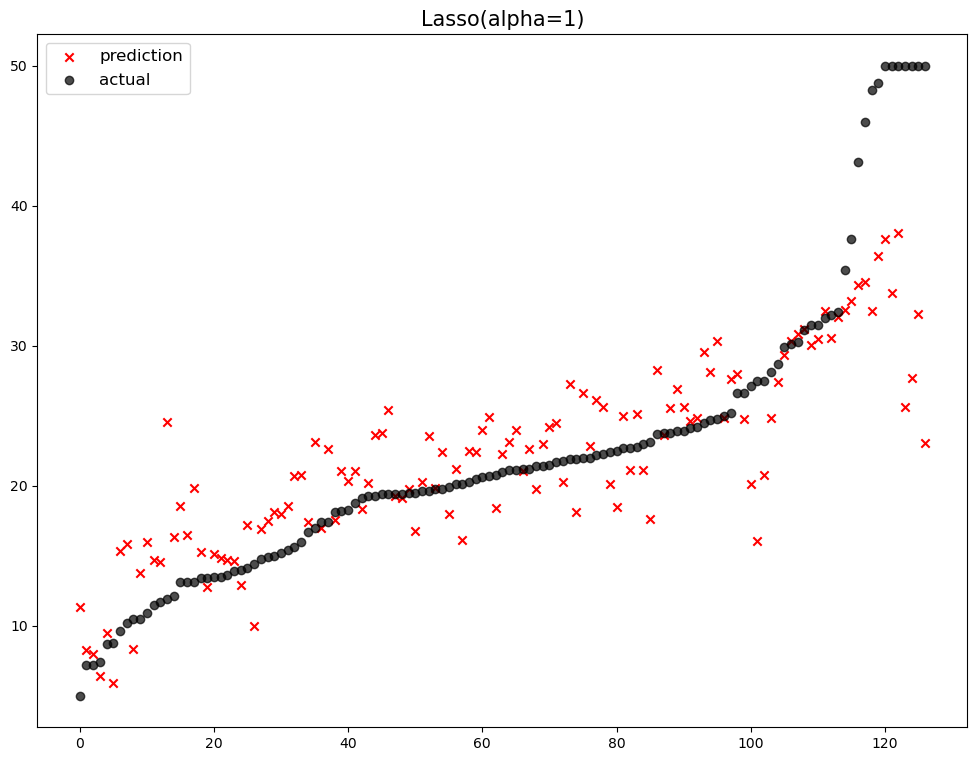

              model        mse
0  Lasso(alpha=100)  89.411990
1   Lasso(alpha=10)  58.044117
2    Lasso(alpha=1)  37.042408
3  LinearRegression  34.179865


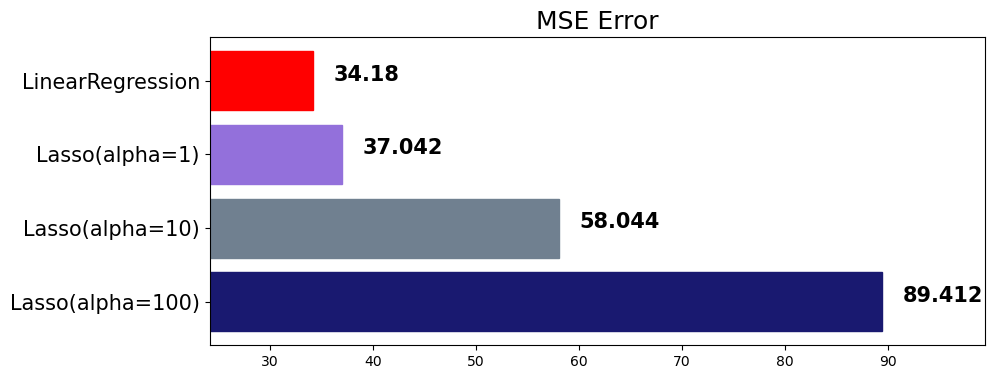

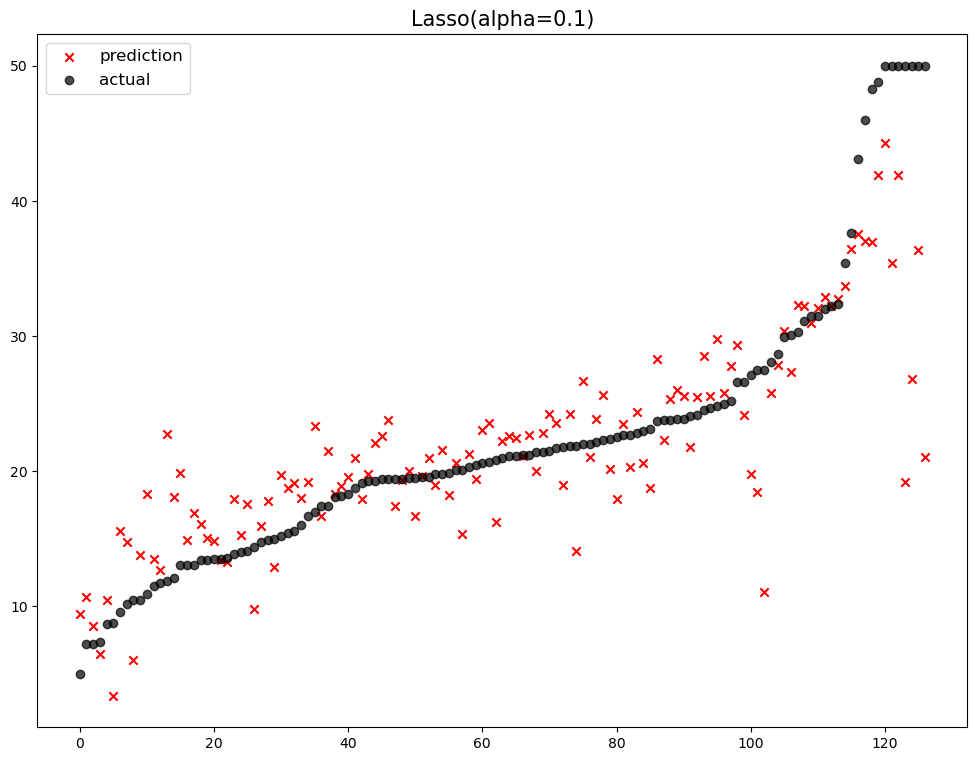

              model        mse
0  Lasso(alpha=100)  89.411990
1   Lasso(alpha=10)  58.044117
2    Lasso(alpha=1)  37.042408
3  Lasso(alpha=0.1)  36.070849
4  LinearRegression  34.179865


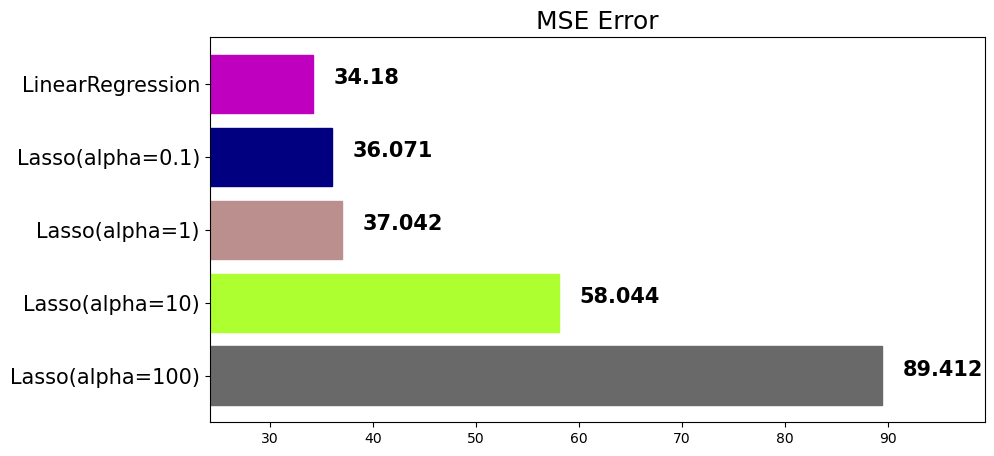

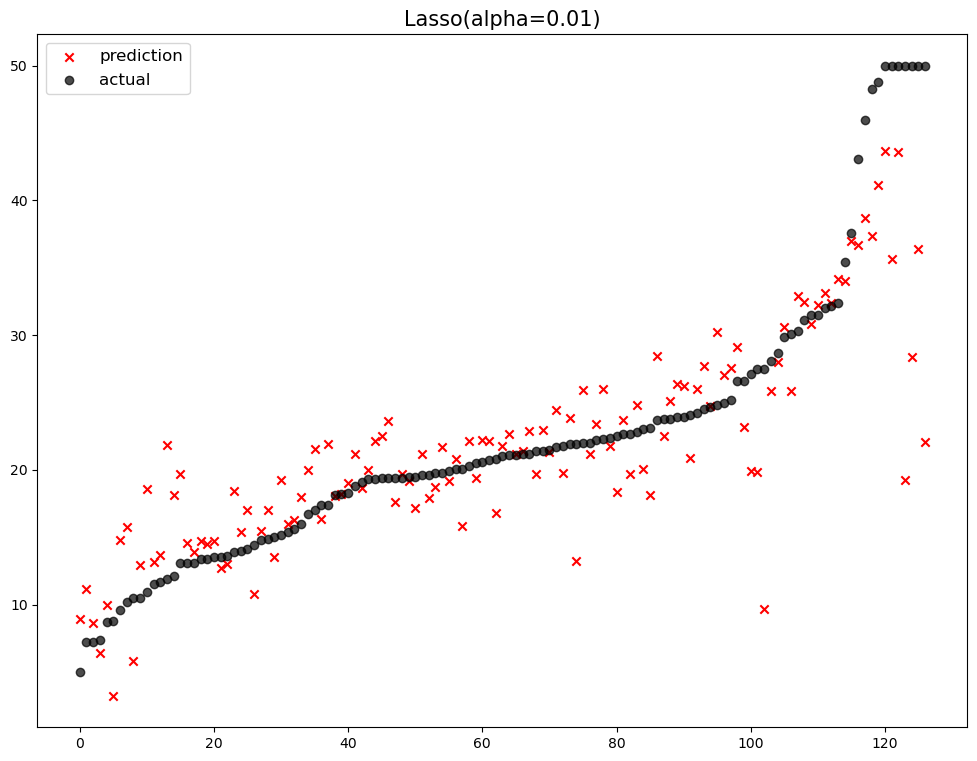

               model        mse
0   Lasso(alpha=100)  89.411990
1    Lasso(alpha=10)  58.044117
2     Lasso(alpha=1)  37.042408
3   Lasso(alpha=0.1)  36.070849
4  Lasso(alpha=0.01)  34.341542
5   LinearRegression  34.179865


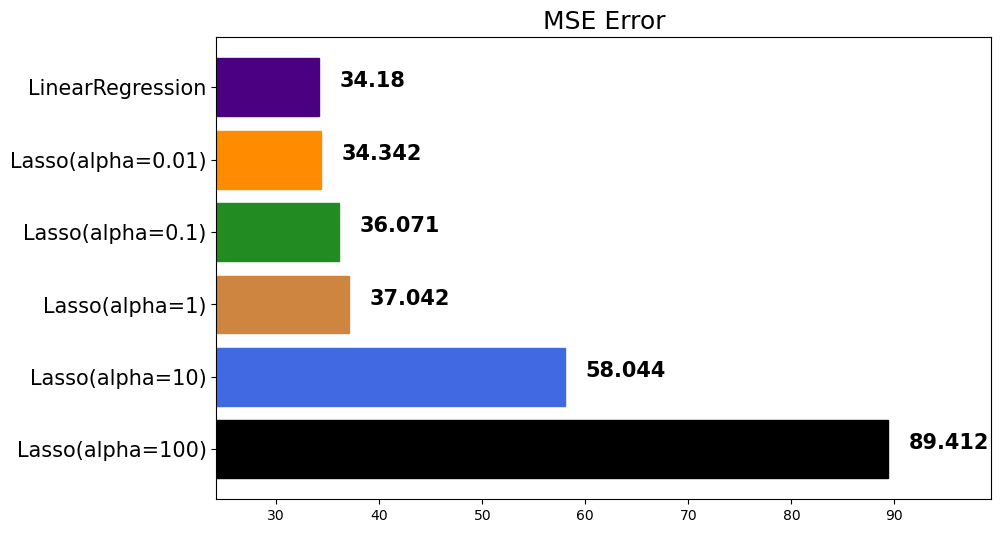

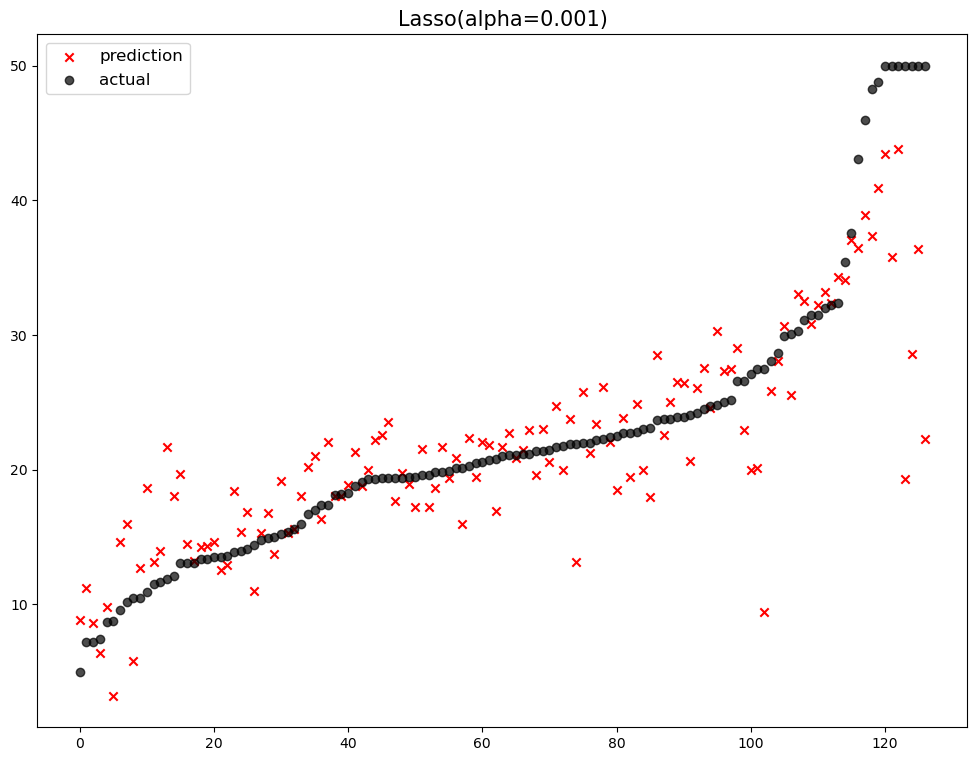

                model        mse
0    Lasso(alpha=100)  89.411990
1     Lasso(alpha=10)  58.044117
2      Lasso(alpha=1)  37.042408
3    Lasso(alpha=0.1)  36.070849
4   Lasso(alpha=0.01)  34.341542
5  Lasso(alpha=0.001)  34.191145
6    LinearRegression  34.179865


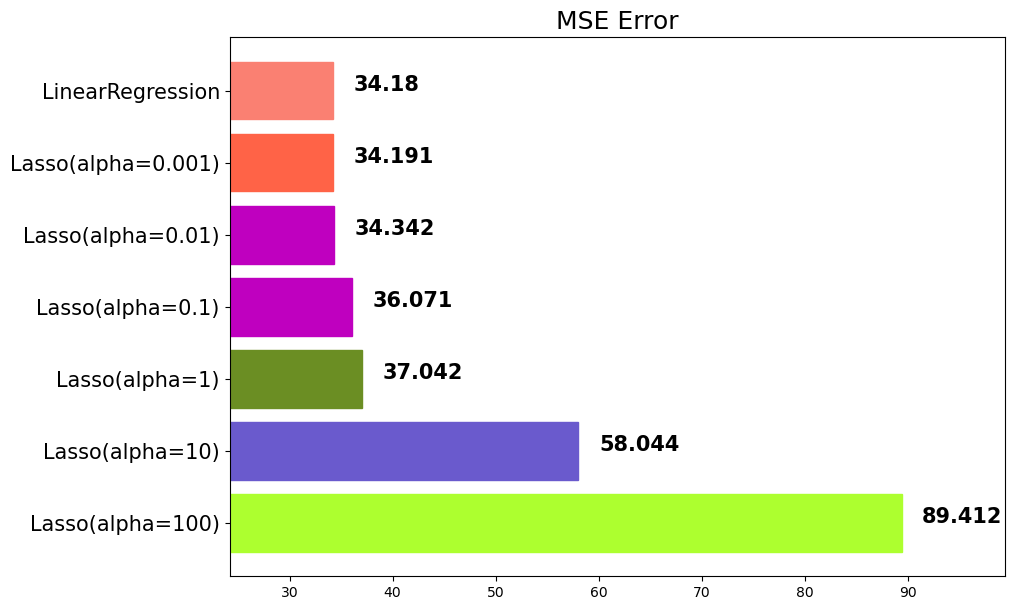

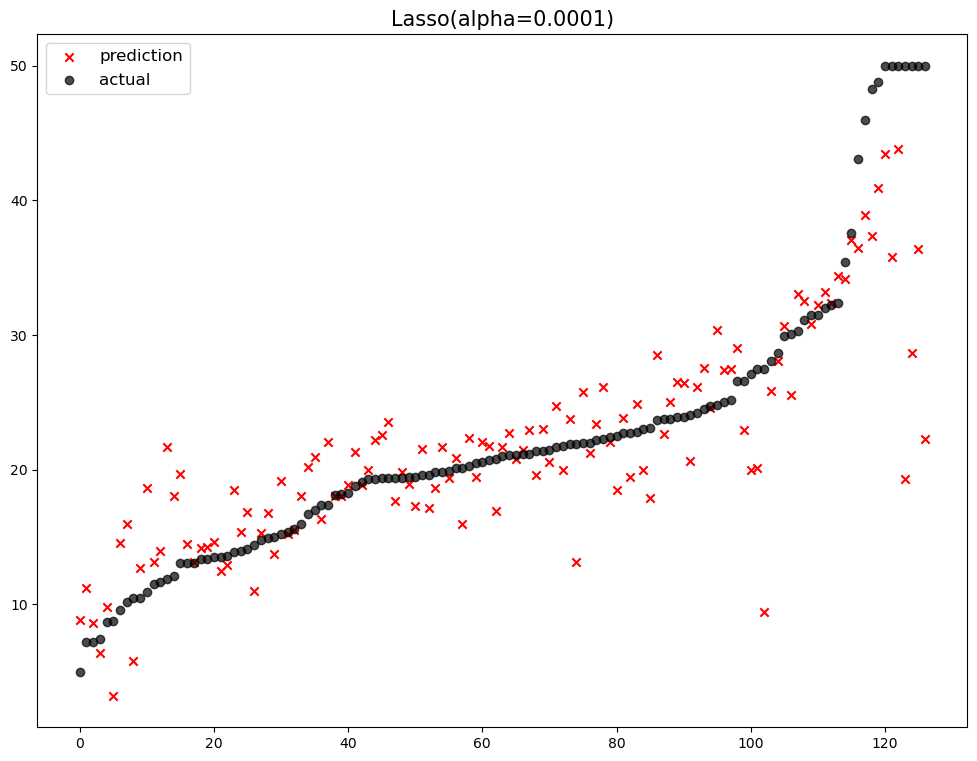

                 model        mse
0     Lasso(alpha=100)  89.411990
1      Lasso(alpha=10)  58.044117
2       Lasso(alpha=1)  37.042408
3     Lasso(alpha=0.1)  36.070849
4    Lasso(alpha=0.01)  34.341542
5   Lasso(alpha=0.001)  34.191145
6  Lasso(alpha=0.0001)  34.180940
7     LinearRegression  34.179865


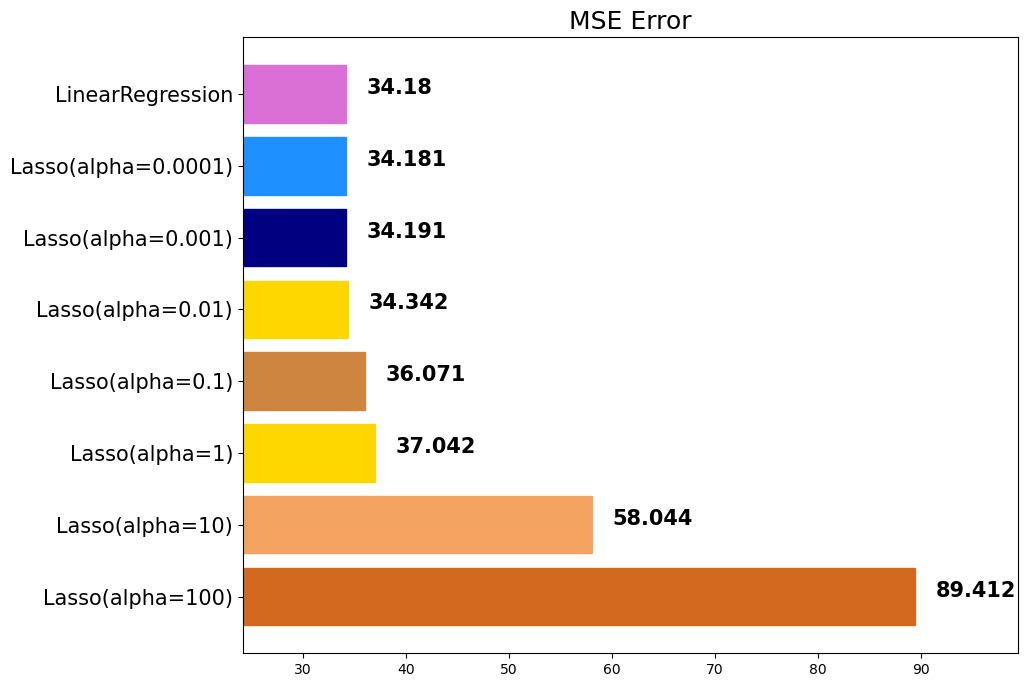

In [65]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

In [66]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

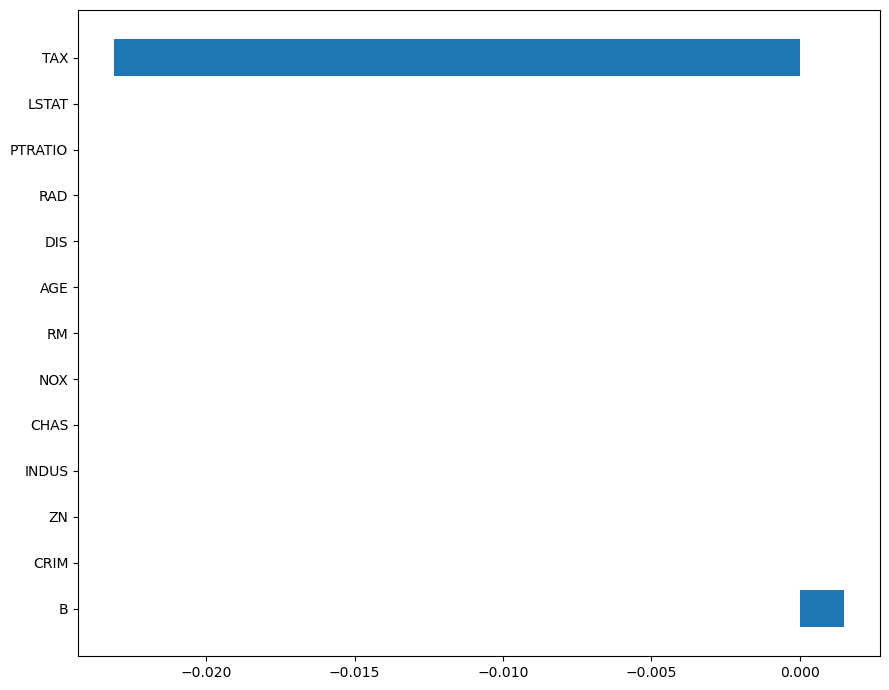

In [67]:
plot_coef(x_train.columns, lasso_100.coef_)

In [68]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.02308612,
       -0.        ,  0.00147183, -0.        ])

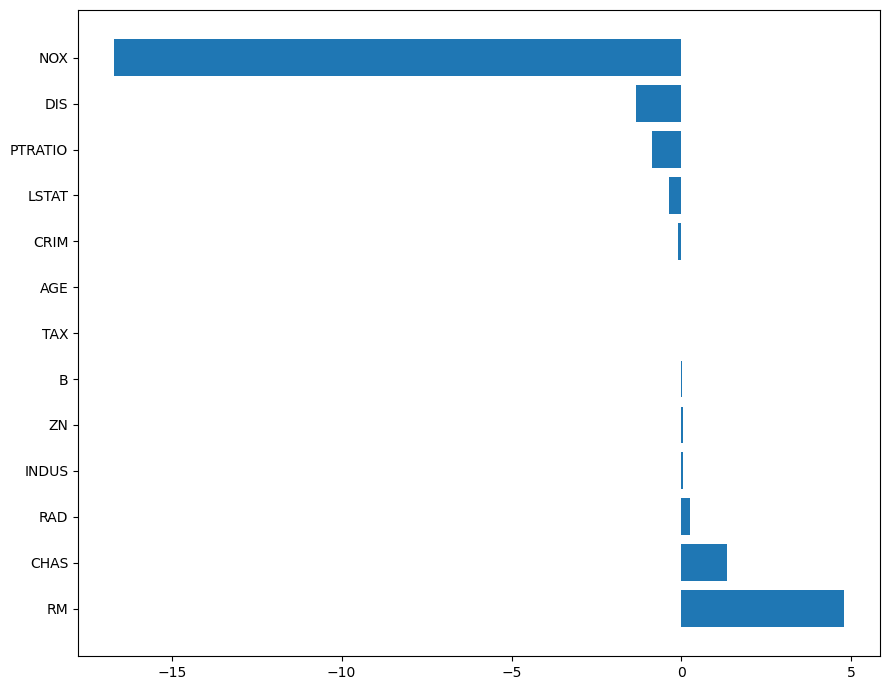

In [69]:
plot_coef(x_train.columns, lasso_001.coef_)

In [70]:
lasso_001.coef_

array([ -0.08885369,   0.04077299,   0.05501038,   1.32930809,
       -16.68692403,   4.77025401,  -0.02046479,  -1.34802031,
         0.24070115,  -0.01316838,  -0.8800191 ,   0.00860612,
        -0.36576961])

### ElasticNet

**l1_ratio (default=0.5)**

 * l1_ratio = 0 (L2 규제만 사용).
 * l1_ratio = 1 (L1 규제만 사용).
 * 0 < l1_ratio < 1 (L1 and L2 규제의 혼합사용)

In [73]:
from sklearn.linear_model import ElasticNet

In [74]:
ratios = [0.2, 0.5, 0.8]

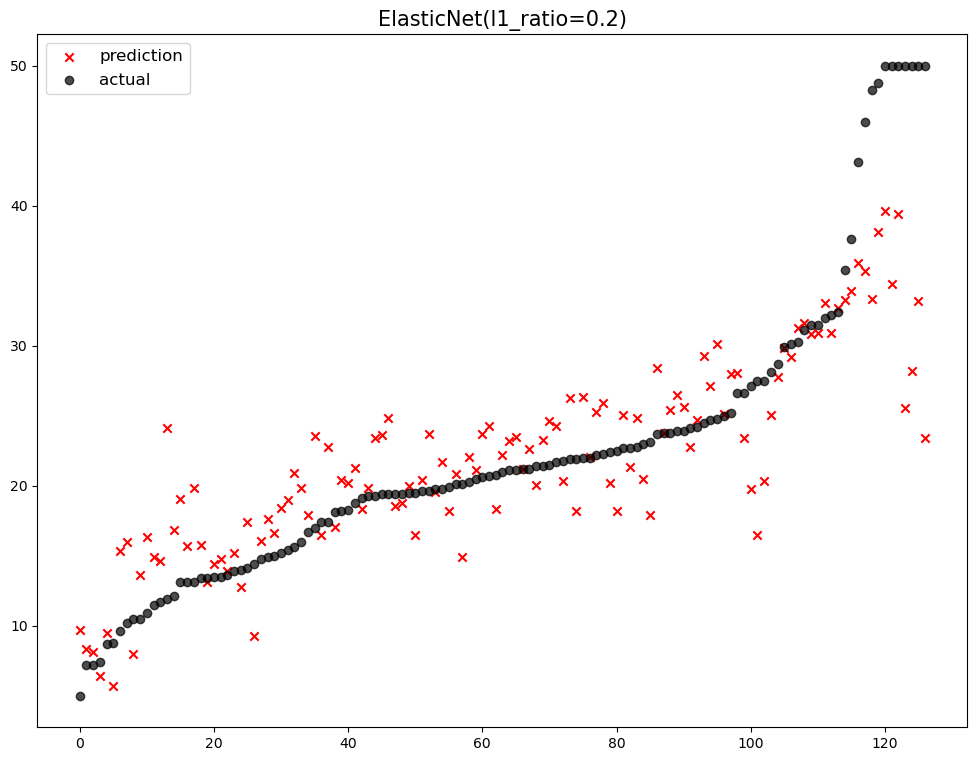

                      model        mse
0          Lasso(alpha=100)  89.411990
1           Lasso(alpha=10)  58.044117
2            Lasso(alpha=1)  37.042408
3          Lasso(alpha=0.1)  36.070849
4  ElasticNet(l1_ratio=0.2)  34.523999
5         Lasso(alpha=0.01)  34.341542
6        Lasso(alpha=0.001)  34.191145
7       Lasso(alpha=0.0001)  34.180940
8          LinearRegression  34.179865


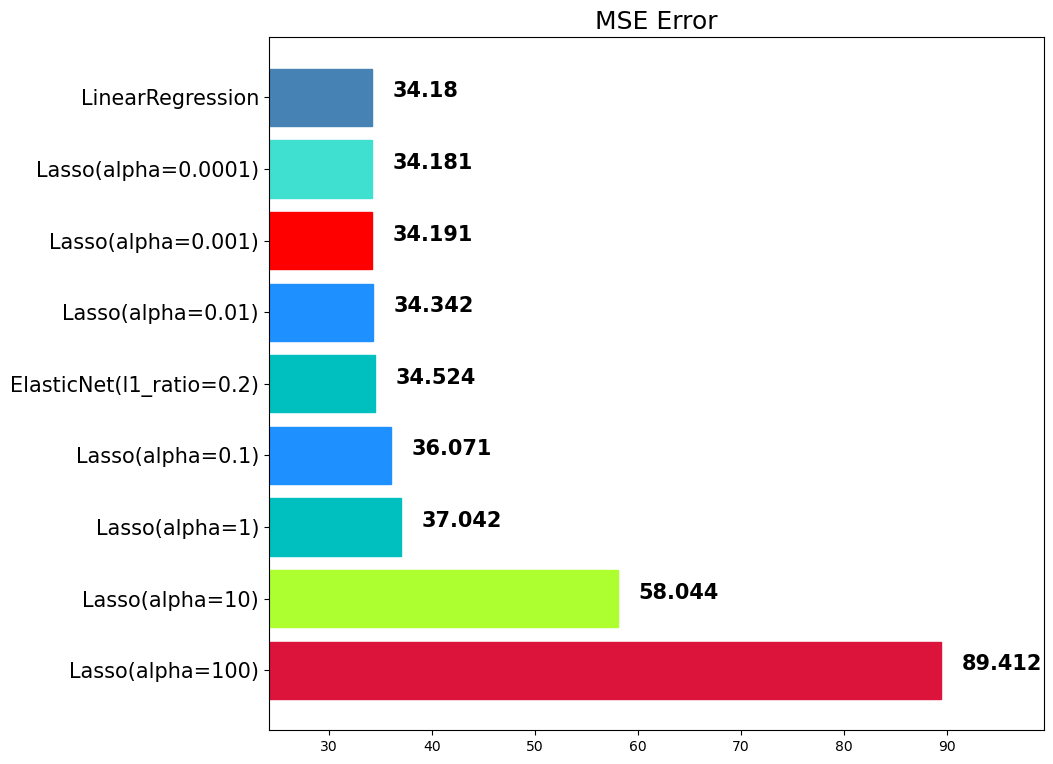

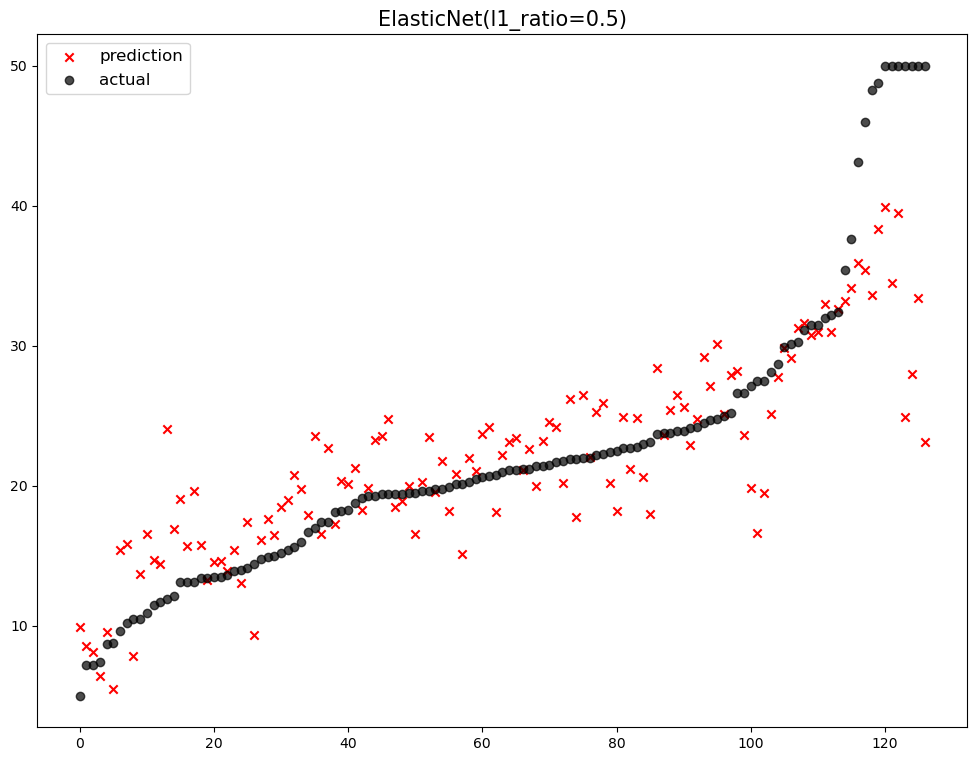

                      model        mse
0          Lasso(alpha=100)  89.411990
1           Lasso(alpha=10)  58.044117
2            Lasso(alpha=1)  37.042408
3          Lasso(alpha=0.1)  36.070849
4  ElasticNet(l1_ratio=0.5)  34.639468
5  ElasticNet(l1_ratio=0.2)  34.523999
6         Lasso(alpha=0.01)  34.341542
7        Lasso(alpha=0.001)  34.191145
8       Lasso(alpha=0.0001)  34.180940
9          LinearRegression  34.179865


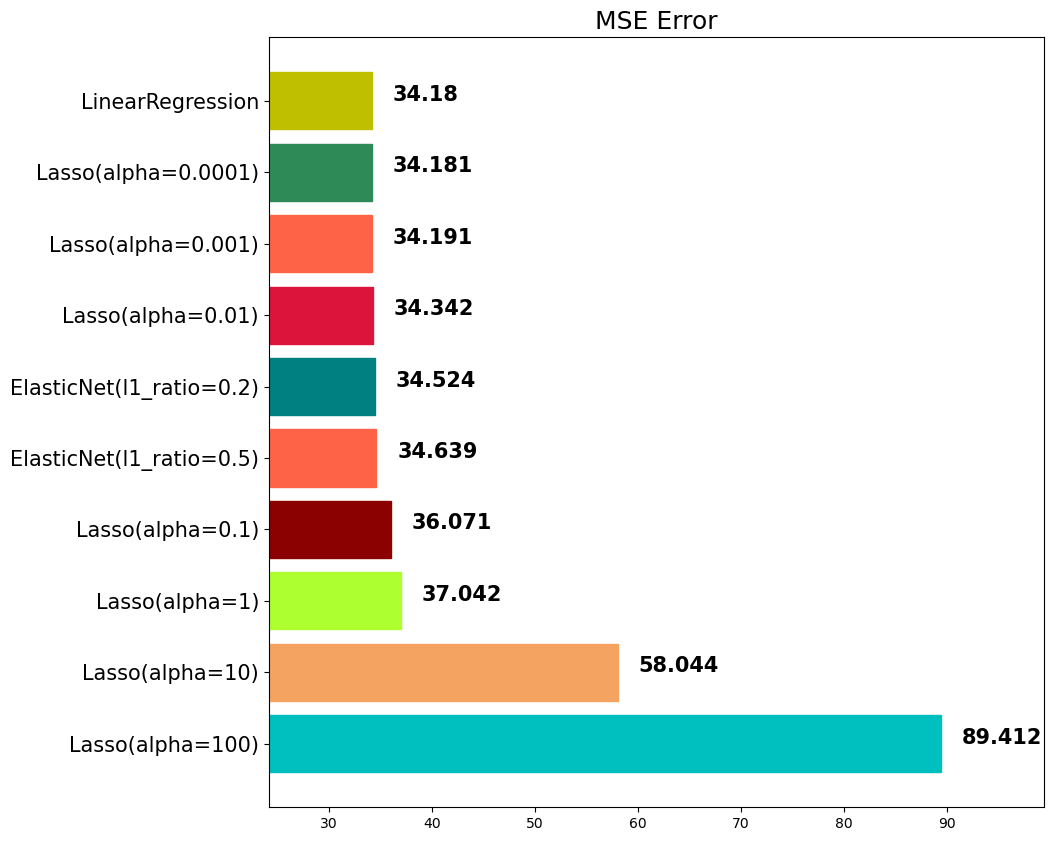

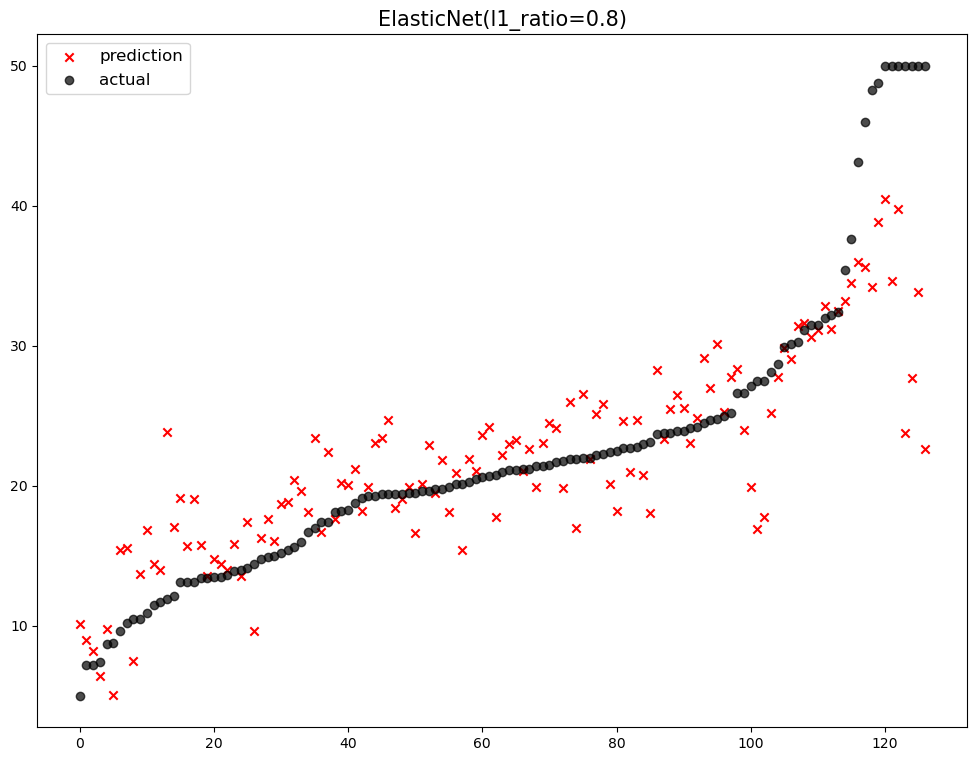

                       model        mse
0           Lasso(alpha=100)  89.411990
1            Lasso(alpha=10)  58.044117
2             Lasso(alpha=1)  37.042408
3           Lasso(alpha=0.1)  36.070849
4   ElasticNet(l1_ratio=0.8)  34.851407
5   ElasticNet(l1_ratio=0.5)  34.639468
6   ElasticNet(l1_ratio=0.2)  34.523999
7          Lasso(alpha=0.01)  34.341542
8         Lasso(alpha=0.001)  34.191145
9        Lasso(alpha=0.0001)  34.180940
10          LinearRegression  34.179865


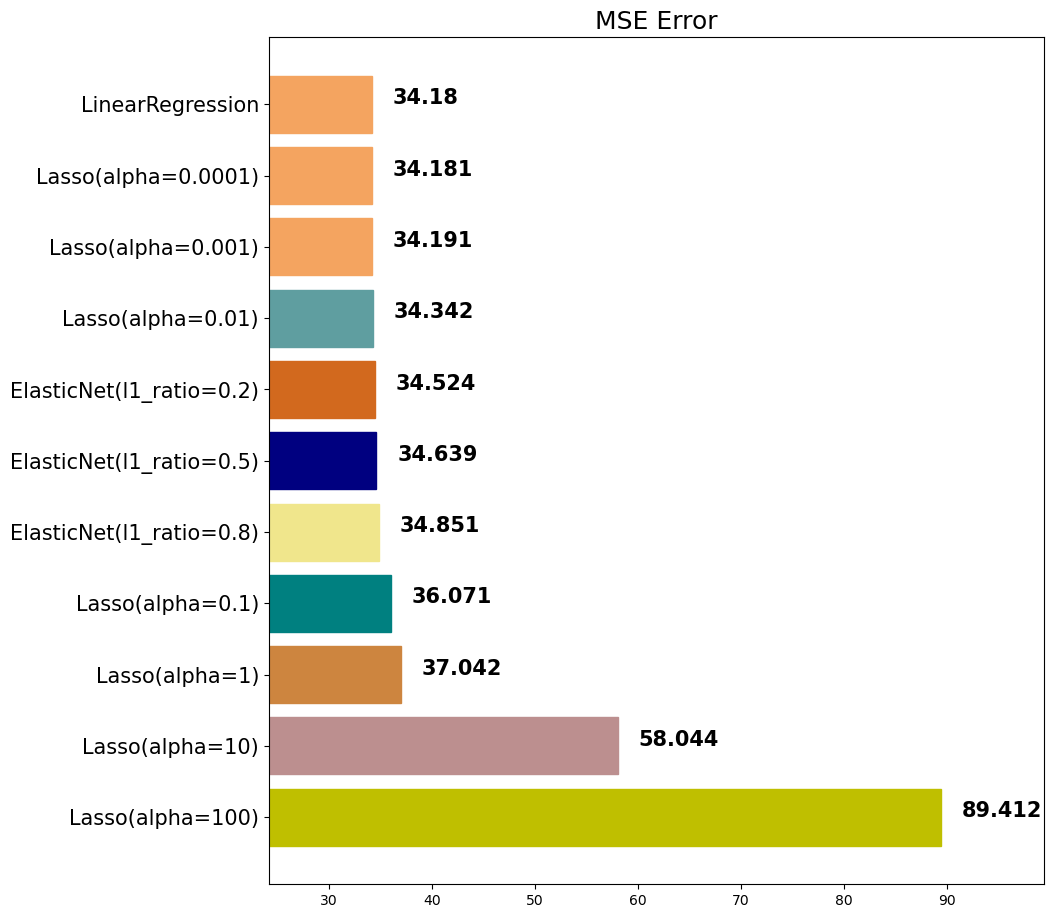

In [75]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)

In [76]:
elsticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elsticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elsticnet_20.predict(x_test)

elsticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elsticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elsticnet_80.predict(x_test)

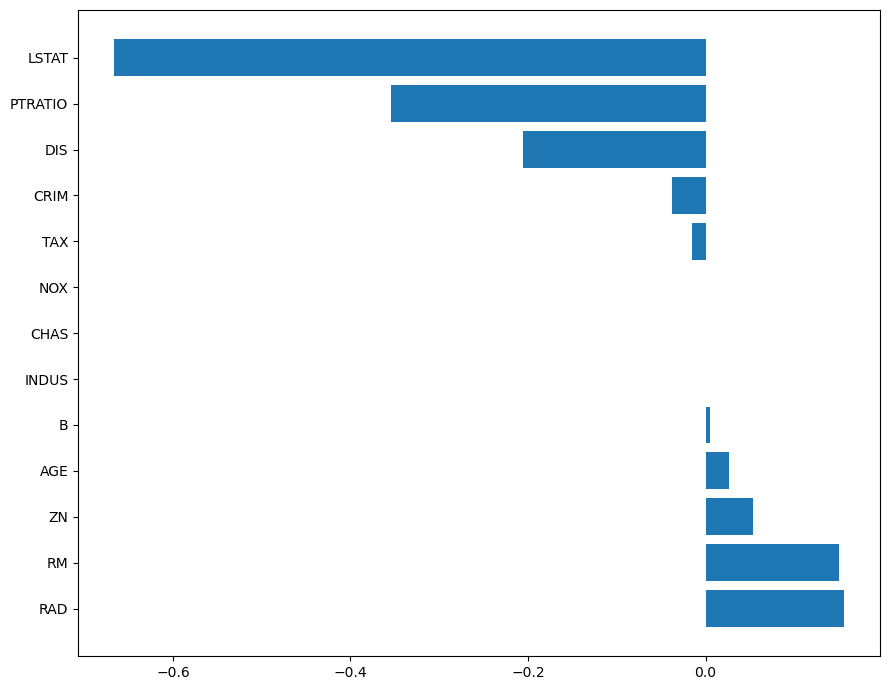

In [77]:
plot_coef(x_train.columns, elsticnet_20.coef_)

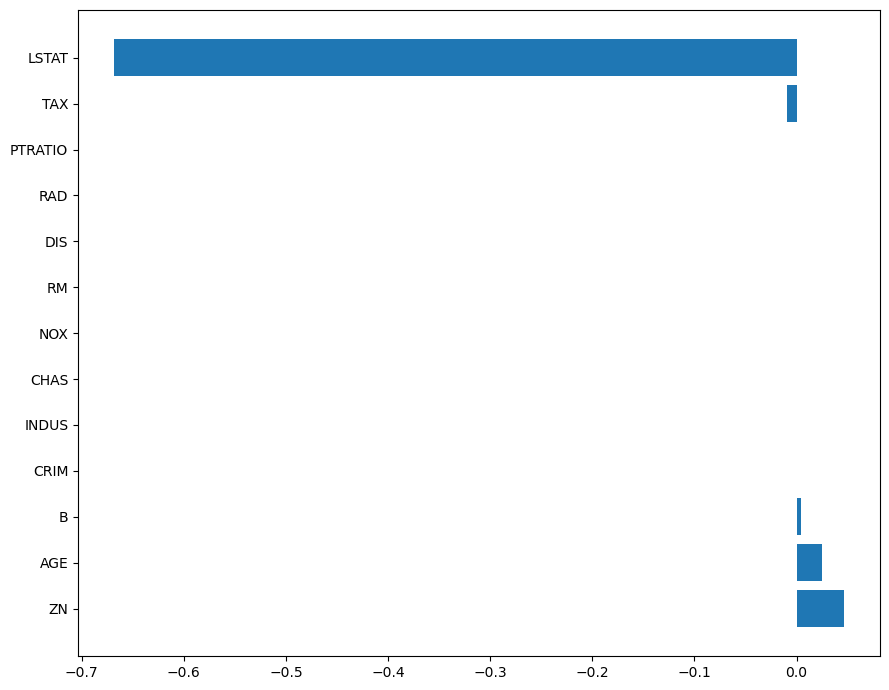

In [78]:
plot_coef(x_train.columns, elsticnet_80.coef_)

In [79]:
elsticnet_80.coef_

array([-0.        ,  0.04594815, -0.        ,  0.        ,  0.        ,
        0.        ,  0.02500528, -0.        ,  0.        , -0.00981168,
       -0.        ,  0.00402508, -0.66785485])

## Scaler

In [81]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [82]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.399125,11.920844,10.696755,0.068602,0.548541,6.301731,67.548021,3.847623,9.292876,402.348285,18.447757,358.505699,12.574723
std,8.474678,23.623431,6.848942,0.253110,0.112711,0.691178,28.064872,2.072292,8.513682,166.392966,2.117717,89.298168,7.196200
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.863000,6.000000,1.137000,1.000000,188.000000,12.600000,0.320000,1.920000
25%,0.076890,0.000000,4.930000,0.000000,0.448000,5.901500,45.050000,2.120350,4.000000,277.000000,17.400000,376.420000,7.035000
50%,0.222120,0.000000,8.140000,0.000000,0.524000,6.223000,74.800000,3.317500,5.000000,330.000000,18.900000,392.050000,10.970000
75%,2.851870,20.000000,18.100000,0.000000,0.624000,6.630000,94.000000,5.214600,8.000000,666.000000,20.200000,396.375000,16.550000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


### StandardScaler

평균(mean)을 0, 표준편차(std)를 1로 만들어 주는 스케일러

In [85]:
std_scaler = StandardScaler()

In [86]:
std_scaled = std_scaler.fit_transform(x_train)

In [87]:
round(pd.DataFrame(std_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.40,-0.51,-1.50,-0.27,-1.45,-3.53,-2.20,-1.31,-0.98,-1.29,-2.77,-4.02,-1.48
25%,-0.39,-0.51,-0.84,-0.27,-0.89,-0.58,-0.80,-0.83,-0.62,-0.75,-0.50,0.20,-0.77
50%,-0.38,-0.51,-0.37,-0.27,-0.22,-0.11,0.26,-0.26,-0.50,-0.44,0.21,0.38,-0.22
75%,-0.06,0.34,1.08,-0.27,0.67,0.48,0.94,0.66,-0.15,1.59,0.83,0.42,0.55
max,10.11,3.73,2.49,3.68,2.86,3.59,1.16,3.32,1.73,1.86,1.68,0.43,3.53


### MinMaxScaler

min값과 max값을 0~1사이로 정규화

In [90]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [91]:
round(pd.DataFrame(minmax_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.04,0.12,0.38,0.07,0.34,0.50,0.65,0.28,0.36,0.41,0.62,0.90,0.30
std,0.10,0.24,0.25,0.25,0.23,0.14,0.30,0.22,0.37,0.32,0.23,0.23,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.16,0.00,0.13,0.41,0.42,0.10,0.13,0.17,0.51,0.95,0.14
50%,0.00,0.00,0.28,0.00,0.29,0.48,0.73,0.23,0.17,0.27,0.67,0.99,0.25
75%,0.03,0.20,0.65,0.00,0.49,0.56,0.94,0.43,0.30,0.91,0.81,1.00,0.41
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### RobustScaler

중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.

**outlier 값 처리에 유용**

In [94]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [95]:
round(pd.DataFrame(robust_scaled).median(), 2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

### 파이프라인

In [97]:
from sklearn.pipeline import make_pipeline

In [98]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [99]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

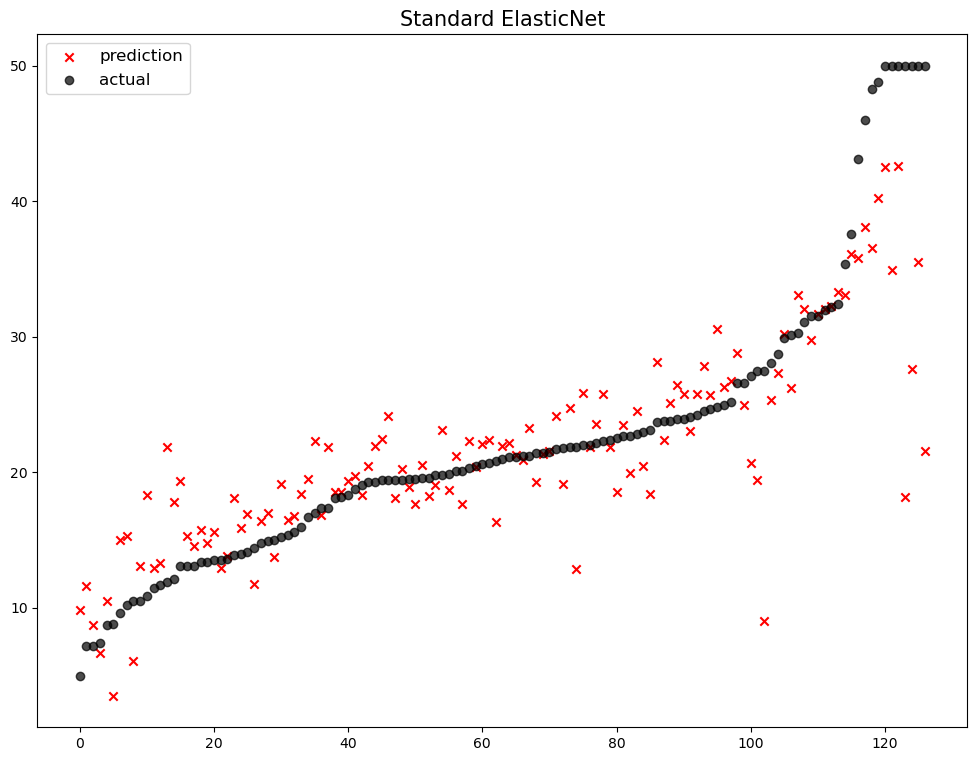

                       model        mse
0           Lasso(alpha=100)  89.411990
1            Lasso(alpha=10)  58.044117
2             Lasso(alpha=1)  37.042408
3        Standard ElasticNet  36.313071
4           Lasso(alpha=0.1)  36.070849
5   ElasticNet(l1_ratio=0.8)  34.851407
6   ElasticNet(l1_ratio=0.5)  34.639468
7   ElasticNet(l1_ratio=0.2)  34.523999
8          Lasso(alpha=0.01)  34.341542
9         Lasso(alpha=0.001)  34.191145
10       Lasso(alpha=0.0001)  34.180940
11          LinearRegression  34.179865


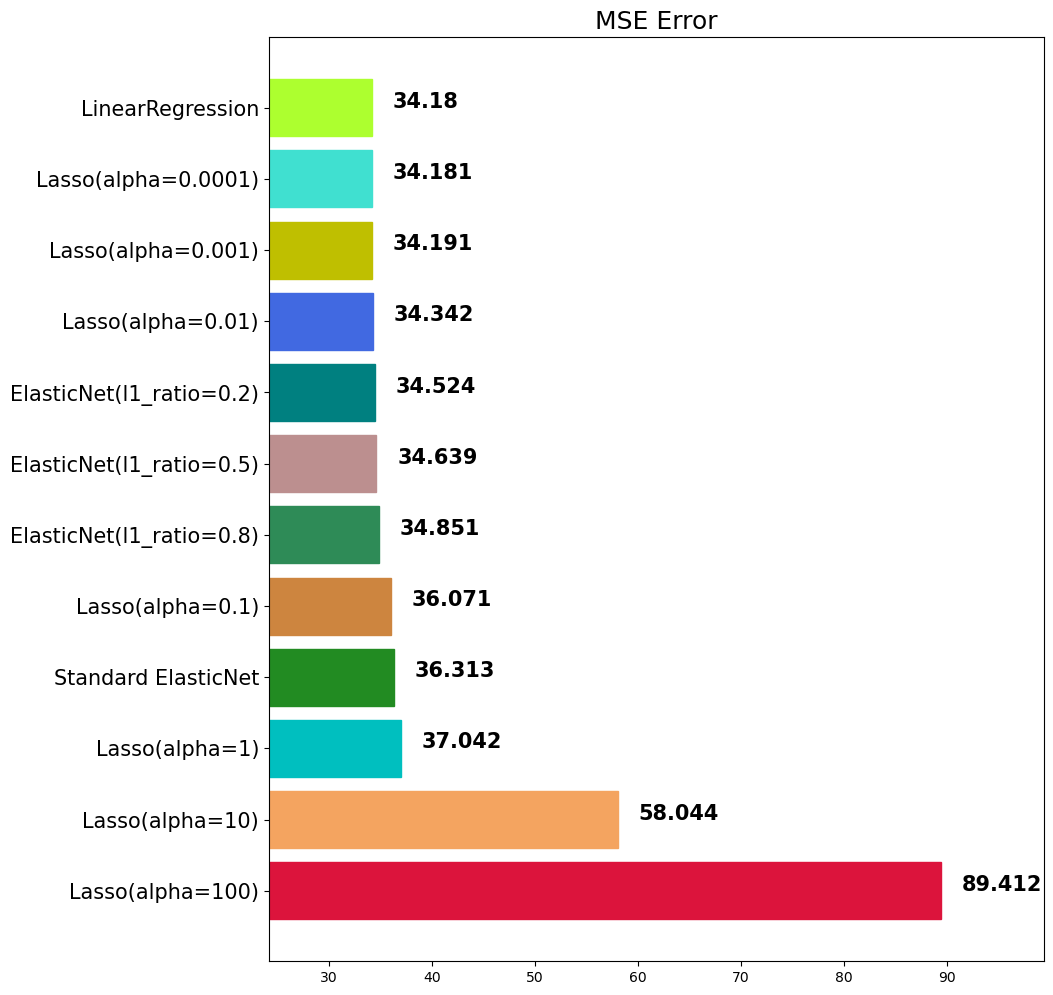

In [100]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

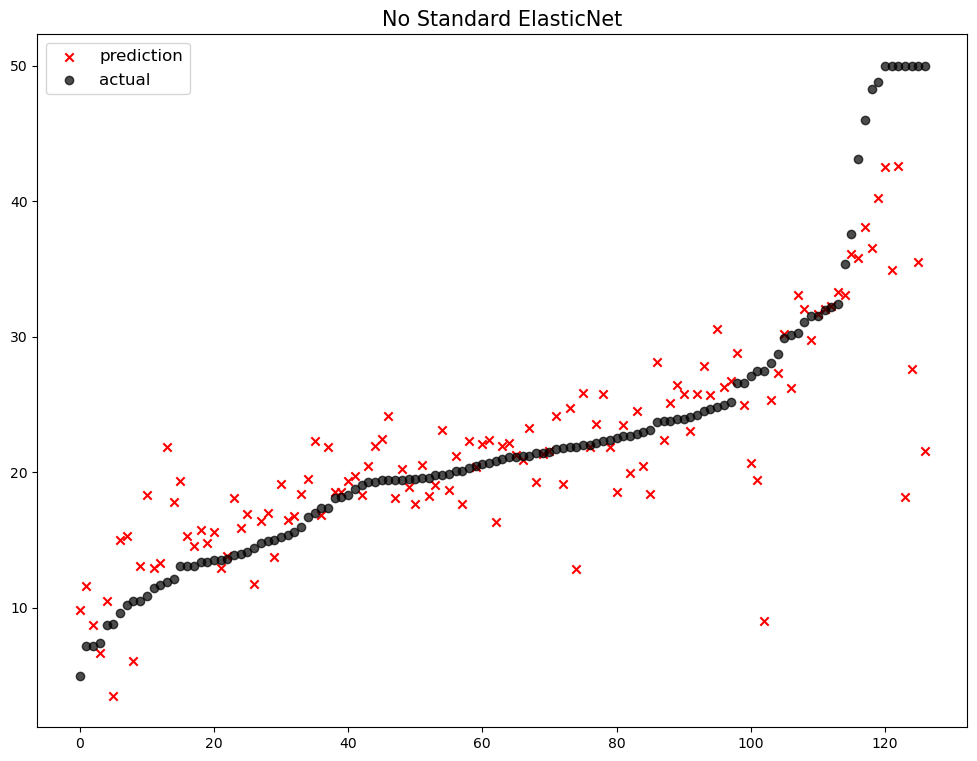

                       model        mse
0           Lasso(alpha=100)  89.411990
1            Lasso(alpha=10)  58.044117
2             Lasso(alpha=1)  37.042408
3        Standard ElasticNet  36.313071
4     No Standard ElasticNet  36.313071
5           Lasso(alpha=0.1)  36.070849
6   ElasticNet(l1_ratio=0.8)  34.851407
7   ElasticNet(l1_ratio=0.5)  34.639468
8   ElasticNet(l1_ratio=0.2)  34.523999
9          Lasso(alpha=0.01)  34.341542
10        Lasso(alpha=0.001)  34.191145
11       Lasso(alpha=0.0001)  34.180940
12          LinearRegression  34.179865


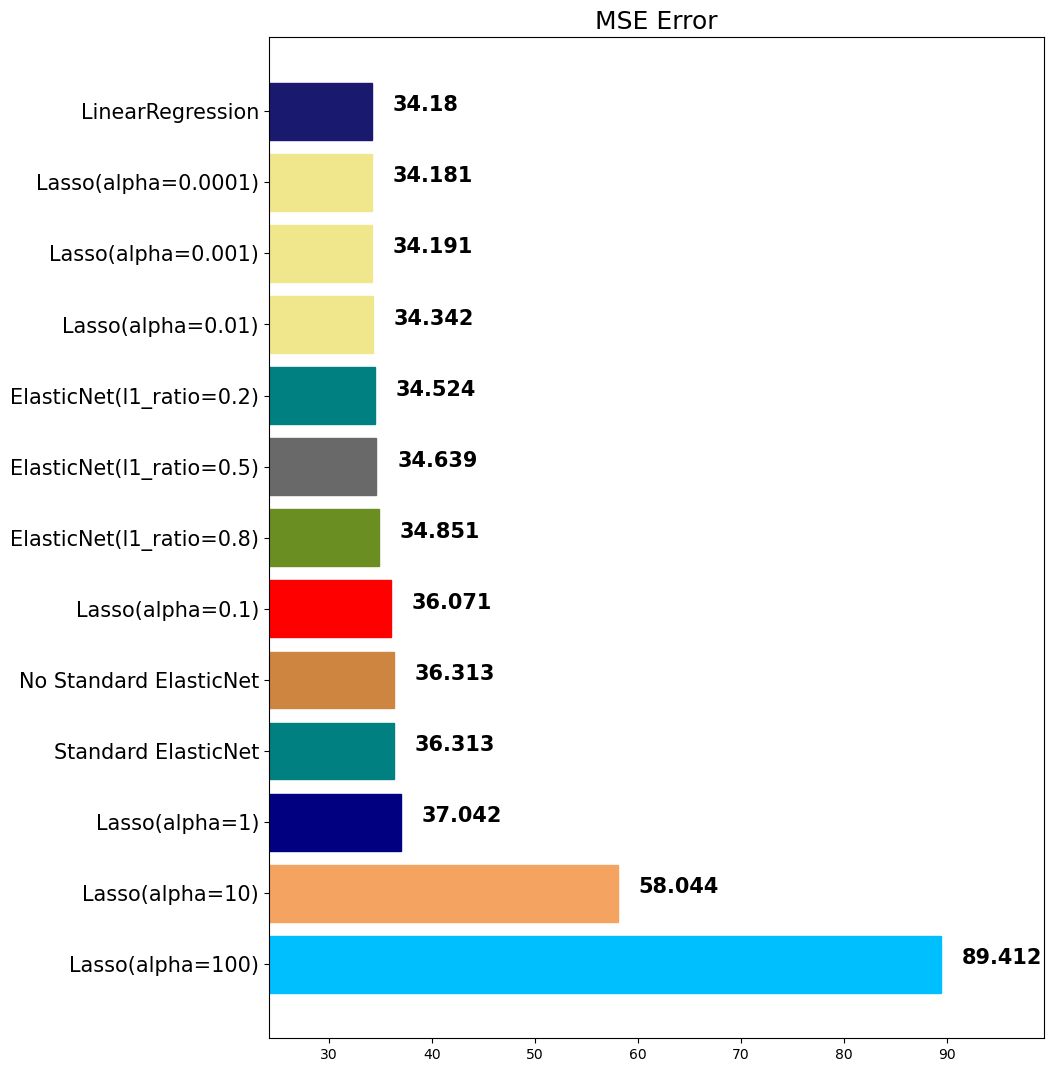

In [101]:
elasticnet_no_pipeline = ElasticNet(alpha=0.1, l1_ratio=0.2)
no_pipeline_pred = elasticnet_no_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('No Standard ElasticNet', elasticnet_pred, y_test)

### Polynomial Features

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly%20feature#sklearn.preprocessing.PolynomialFeatures)

다항식의 계수간 상호작용을 통해 **새로운 feature를 생성**합니다.

예를들면, [a, b] 2개의 feature가 존재한다고 가정하고,

degree=2로 설정한다면, polynomial features 는 [1, a, b, a^2, ab, b^2] 가 됩니다.

In [105]:
from sklearn.preprocessing import PolynomialFeatures

In [106]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [107]:
poly_features = poly.fit_transform(x_train)[0]

In [108]:
poly_features

array([     0.52693   ,      0.        ,      6.2       ,      0.        ,
            0.504     ,      8.725     ,     83.        ,      2.8944    ,
            8.        ,    307.        ,     17.4       ,    382.        ,
            4.63      ,      0.27765522,      0.        ,      3.266966  ,
            0.        ,      0.26557272,      4.59746425,     43.73519   ,
            1.52514619,      4.21544   ,    161.76751   ,      9.168582  ,
          201.28726   ,      2.4396859 ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,     38.44      ,      0.        ,
            3.1248    ,     54.095     ,    514.6       ,     17.94528   ,
           49.6       ,   1903.4       ,    107.88      ,   2368.4       ,
           28.706     ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [109]:
x_train.iloc[0]

CRIM         0.52693
ZN           0.00000
INDUS        6.20000
CHAS         0.00000
NOX          0.50400
RM           8.72500
AGE         83.00000
DIS          2.89440
RAD          8.00000
TAX        307.00000
PTRATIO     17.40000
B          382.00000
LSTAT        4.63000
Name: 225, dtype: float64

In [110]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [111]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.638e+01, tolerance: 2.953e+00
  model = cd_fast.enet_coordinate_descent(


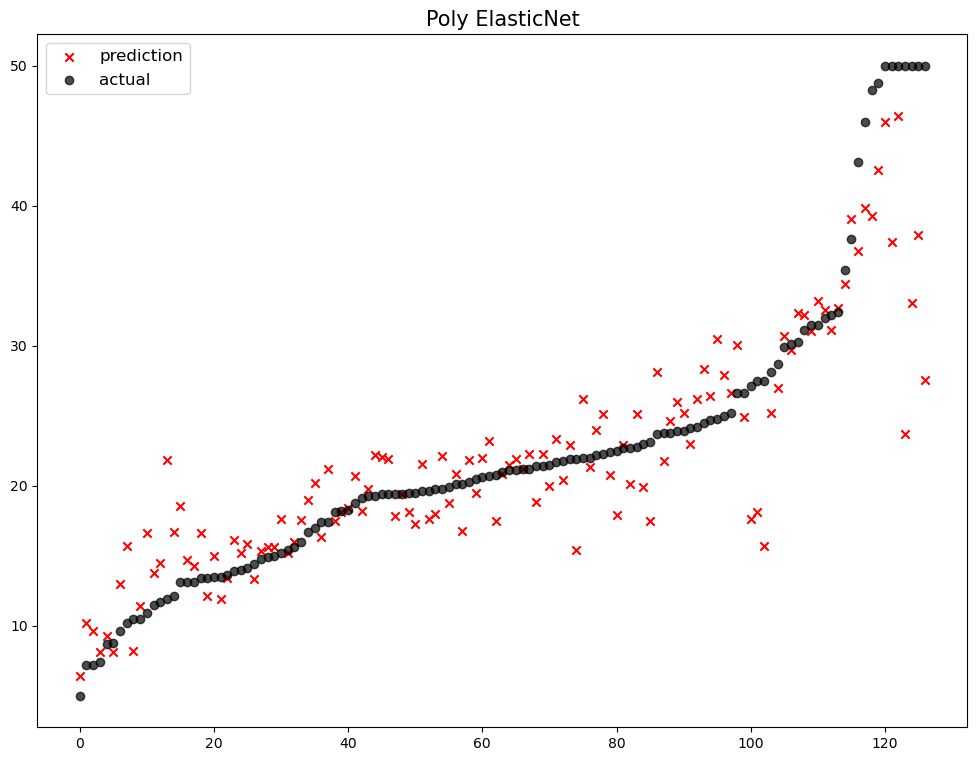

                       model        mse
0           Lasso(alpha=100)  89.411990
1            Lasso(alpha=10)  58.044117
2             Lasso(alpha=1)  37.042408
3        Standard ElasticNet  36.313071
4     No Standard ElasticNet  36.313071
5           Lasso(alpha=0.1)  36.070849
6   ElasticNet(l1_ratio=0.8)  34.851407
7   ElasticNet(l1_ratio=0.5)  34.639468
8   ElasticNet(l1_ratio=0.2)  34.523999
9          Lasso(alpha=0.01)  34.341542
10        Lasso(alpha=0.001)  34.191145
11       Lasso(alpha=0.0001)  34.180940
12          LinearRegression  34.179865
13           Poly ElasticNet  24.048146


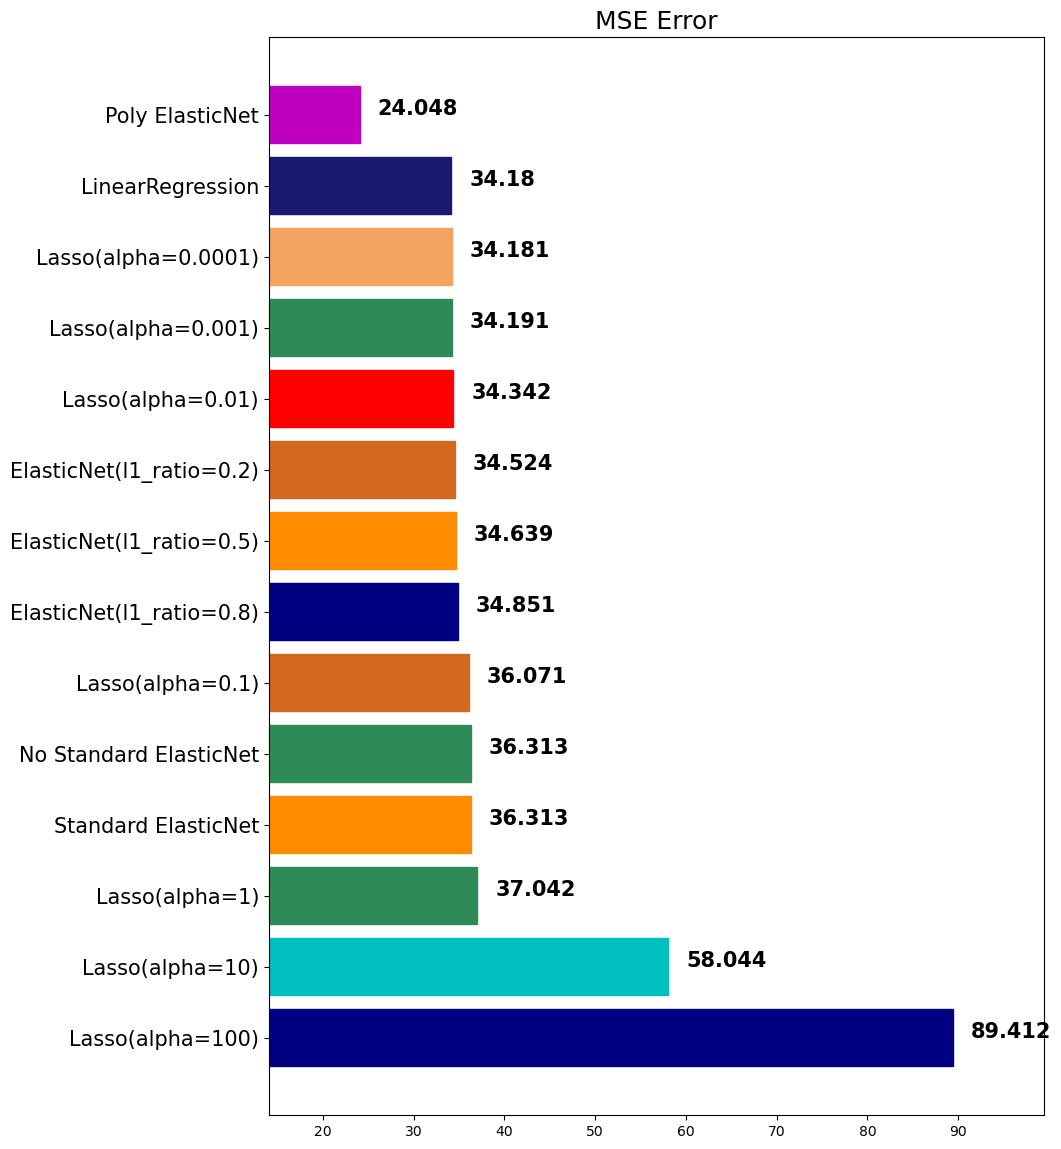

In [112]:
mse_eval('Poly ElasticNet', poly_pred, y_test)